In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
!wget http://cb.lk/covid_19

--2022-09-01 15:43:05--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-09-01 15:43:05--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-09-01 15:43:06--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-09-01 15:43

In [32]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_

# Load Datasets

In [33]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

# **Importing Required Libraries**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# **Building Architecture**


In [35]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

# **Train From Scratch**

## *Data Augmentation*

In [37]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [39]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [40]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


# **Fit The Model**

In [41]:
hist =model.fit(train_generator,steps_per_epoch = 7,epochs = 10,validation_data = validation_generator,validation_steps = 2)

Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 0.8455 - accuracy: 0.4777 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 0.6905 - accuracy: 0.5045 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.6819 - accuracy: 0.5670 - val_loss: 0.6827 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.6159 - accuracy: 0.6562 - val_loss: 0.5685 - val_accuracy: 0.8667
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.4983 - accuracy: 0.7589 - val_loss: 0.3581 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.3383 - accuracy: 0.8571 - val_loss: 0.2340 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.2982 - accuracy: 0.8929 - val_loss: 0.1992 - val_accuracy: 0.9667
Epoch 8/10
7/7 [=======================

## *Loss is very less and accuracy is on point*

In [42]:
model.save("Detection_Covid_19.h5")

In [43]:
 model.evaluate(train_generator)

7/7 [==============================] - 7s 1s/step - loss: 0.1071 - accuracy: 0.9554


[0.10714966058731079, 0.9553571343421936]

In [44]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 773ms/step - loss: 0.0476 - accuracy: 0.9833


[0.04764275252819061, 0.9833333492279053]

# **Test Images**

In [45]:
model = load_model("Detection_Covid_19.h5")

In [46]:
import os

In [47]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

# **Confusion Matrix**

In [48]:
y_actual = []
y_test = []

In [49]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict(img) 
  classes_x=np.argmax(p,axis=1)
  #p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [50]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p=model.predict(img) 
  classes_x=np.argmax(p,axis=1)
  #p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [51]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_actual,y_test)

In [54]:
import seaborn as sns

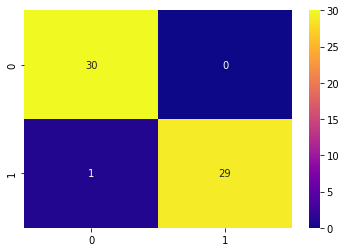

In [55]:
 sns.heatmap(cm,cmap = "plasma" , annot=True)

In [56]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## ***Confusion Matrix***

Confusion matrix, without normalization
[[30  0]
 [ 1 29]]


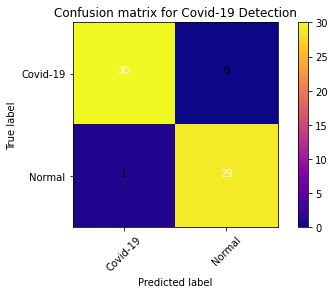

In [57]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_actual))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        31
         1.0       0.97      1.00      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [65]:
from sklearn.metrics import roc_curve

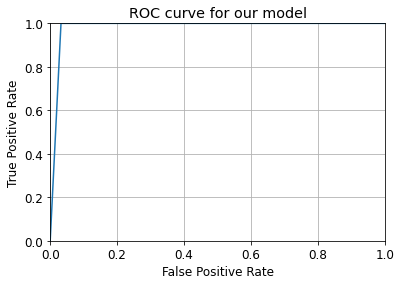

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_actual)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# **List all data in history**

In [59]:

history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Summarize history for accuracy**

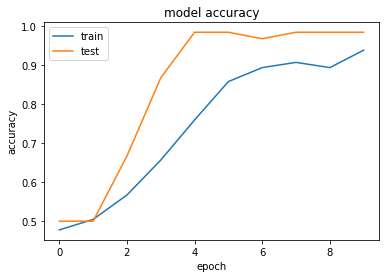

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# **Summarize history for loss**

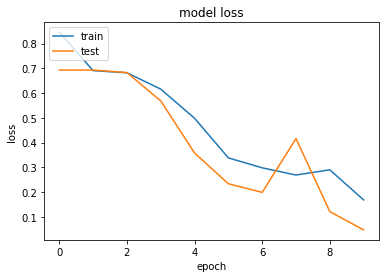

In [61]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Predictions from X-Ray Images**

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


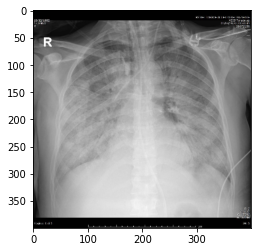

In [62]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Val/Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=model.predict(xtest_image)
#results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/CovidDataset/Val/Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is of Negative covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


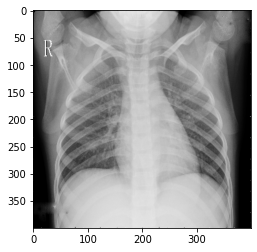

In [63]:
import numpy as np
# from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Val/Normal/NORMAL2-IM-0790-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results=model.predict(xtest_image)
#results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/CovidDataset/Val/Normal/NORMAL2-IM-0790-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)